In [13]:
# for data processing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

2.14.0


In [14]:
labels=os.listdir("Africa")
labels

['.DS_Store', 'zebra', 'buffalo', 'rhino', 'elephant']

In [15]:
os.listdir("Africa/Buffalo")[:5]

['189.jpg', '289.txt', '262.txt', '276.txt', '162.jpg']

In [16]:
data_buffalo_258=open("Africa/Buffalo/258.txt")
data_buffalo_258.read()

'0 0.646484 0.656081 0.697656 0.666216'

#### Gathering file paths

Este código recorre archivos en un directorio específico, muestra imágenes que no son archivos de texto y se detiene después de mostrar tres imágenes.

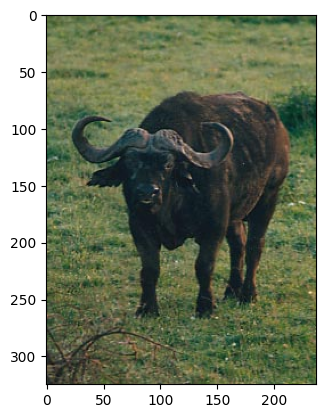

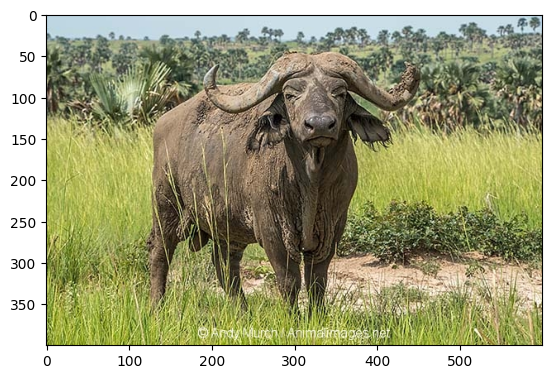

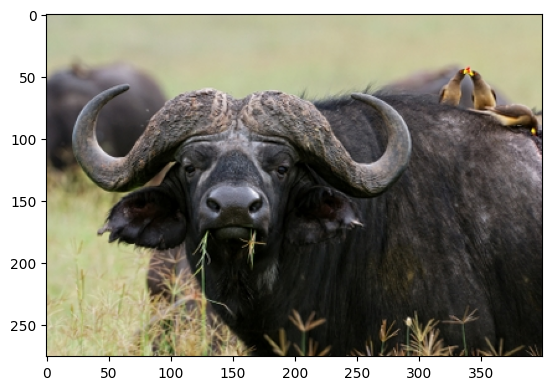

In [17]:
k=0
for i in os.listdir('Africa/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/buffalo/'+i)
    plt.imshow(img)
    plt.show()
    k+=1
  if k==3:
    break

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Split of data for Buffalo

In [19]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/buffalo/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(0) #Crea una lista con valores 0, categ buffalo

In [20]:
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop('label',1)
y=data['label']

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/4211988936.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('label',1)


In [21]:
xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

In [22]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((300, 49152), (76, 49152), (300,), (76,))

In [65]:
xtr1.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
284,0.258261,0.230660,0.164296,0.175370,0.150796,0.118225,0.176027,0.169460,0.113097,0.287529,...,0.598029,0.603945,0.607364,0.624039,0.566485,0.574462,0.594744,0.522757,0.536293,0.538603
272,0.199911,0.190070,0.180669,0.215294,0.203356,0.185215,0.290557,0.255991,0.217285,0.366807,...,0.593139,0.846457,0.737570,0.564983,0.786978,0.694562,0.541494,0.780443,0.677291,0.520196
214,0.580462,0.596149,0.694188,0.583128,0.598814,0.696853,0.589044,0.604730,0.702769,0.592150,...,0.138099,0.227575,0.185276,0.140639,0.214070,0.188296,0.124924,0.261443,0.233029,0.158814
63,0.201425,0.299464,0.279020,0.219848,0.317888,0.297444,0.177591,0.275550,0.255235,0.168320,...,0.489504,0.685105,0.441166,0.373516,0.797749,0.514643,0.424166,0.894710,0.671126,0.585477
134,0.324894,0.435796,0.121189,0.382149,0.369967,0.237185,0.410069,0.392481,0.284885,0.361743,...,0.439248,0.528827,0.679129,0.308092,0.529986,0.687470,0.291026,0.515881,0.661379,0.327405


#### Split of data for Elephant

In [ ]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Elephant/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Elephant/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(1) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop('label',1)
y=data['label']
xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/309270716.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('label',1)


#### Split of data for Rhino

In [ ]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Rhino/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Rhino/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(2) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop('label',1)
y=data['label']
xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/1249563437.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('label',1)


#### Split of data for Zebra

In [ ]:
df=[] #una lista vacía 'df' para almacenar las imágenes
label=[] #otra 'label' para etiquetas
for i in os.listdir('Africa/Zebra/'):
  if i[-3:] !='txt':
    img=mpimg.imread('Africa/Zebra/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
#el código recorre los archivos en el directorio'Africa/Buffalo/' y verifica si el archivo no tiene una extensión '.txt'. Si no es un archivo de texto, el código carga la imagen, la redimensiona a 128x128 píxeles y la convierte en un tensor
for i in range(len(df)):
  label.append(3) #Crea una lista con valores 1, categ buffalo
df=pd.DataFrame(df) #Data frame for data
label=pd.DataFrame({'label':label}) #Data frame for label
data=pd.concat([label,df],axis=1) #Data concatenada
X=data.drop('label',1)
y=data['label']
xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.2,random_state=0) #separacion train and test

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/3764292206.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('label',1)


# Data Frame Generation

**Creating** separate train and test of each type of animal.

In [ ]:
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

Connecting the train parts and test parts of each folder.

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test.sample(frac=1)

X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/765543637.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train=train.drop('label',1)
/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_919/765543637.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test=test.drop('label',1)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

In [ ]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 49152), (304, 49152), (1200,), (304,))

Reshuffling the train and test dataset.

In [ ]:
X_train=X_train.reshape(1200,128,128,3)
X_test=X_test.reshape(304,128,128,3)

Producing Featureset and Target Value from the data.

In [ ]:
decoder=['Buffalo','Elephant','Rhino','Zebra']

In [ ]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

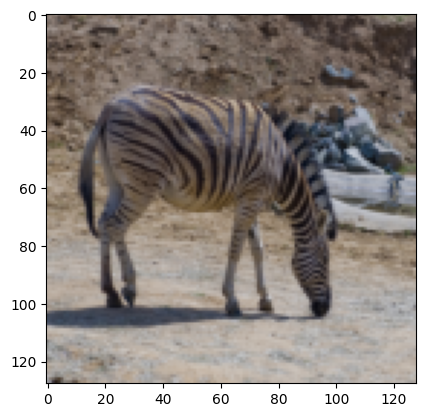

Zebra


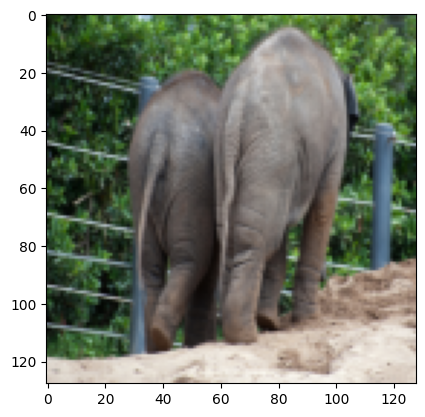

Elephant


In [ ]:
for i in range(2):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [ ]:
y_train=y_train.reshape(1200,1)
y_tets=y_test.reshape(304,1)

# Build the Model

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 dense (Dense)               (None, 126, 126, 64)      4160      
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 dense_1 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_1 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 97s 2s/step - loss: 4.2963 - accuracy: 0.3233 - val_loss: 1.3596 - val_accuracy: 0.3421
Epoch 2/10
60/60 [==============================] - 99s 2s/step - loss: 1.2502 - accuracy: 0.4608 - val_loss: 1.2285 - val_accuracy: 0.4704
Epoch 3/10
60/60 [==============================] - 93s 2s/step - loss: 1.1005 - accuracy: 0.5300 - val_loss: 1.1201 - val_accuracy: 0.5000
Epoch 4/10
60/60 [==============================] - 94s 2s/step - loss: 0.8062 - accuracy: 0.6858 - val_loss: 0.9965 - val_accuracy: 0.5789
Epoch 5/10
60/60 [==============================] - 99s 2s/step - loss: 0.4736 - accuracy: 0.8317 - val_loss: 1.4399 - val_accuracy: 0.5197
Epoch 6/10
60/60 [==============================] - 101s 2s/step - loss: 0.2110 - accuracy: 0.9392 - val_loss: 1.4362 - val_accuracy: 0.5395
Epoch 7/10
60/60 [==============================] - 97s 2s/step - loss: 0.0736 - accuracy: 0.9842 - val_loss: 1.5331 - val_accuracy: 0.5888
Epoch 8/10
60/60 [=

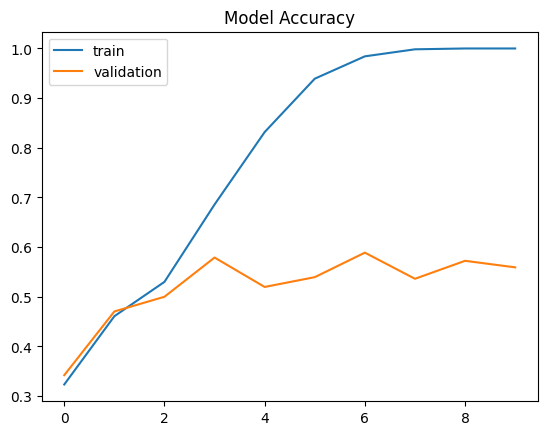

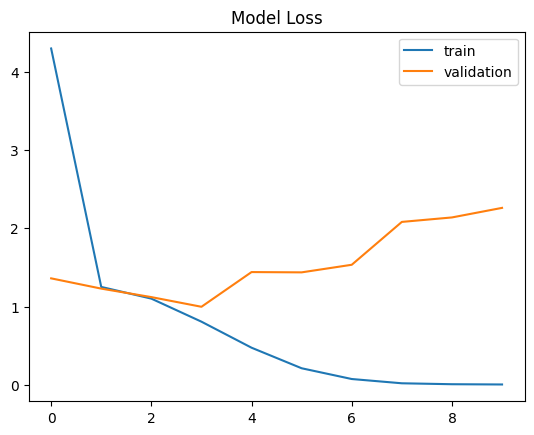

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Kernel (3,3)

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(4,4),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      3136      
                                                                 
 dense_4 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 dense_5 (Dense)             (None, 125, 125, 64)      4160      
                                                                 
 dropout_3 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1000000)           0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
60/60 [==============================] - 101s 2s/step - loss: 6.1841 - accuracy: 0.2800 - val_loss: 1.3688 - val_accuracy: 0.2599
Epoch 2/10
60/60 [==============================] - 96s 2s/step - loss: 1.3725 - accuracy: 0.2725 - val_loss: 1.3871 - val_accuracy: 0.2599
Epoch 3/10
60/60 [==============================] - 95s 2s/step - loss: 1.3819 - accuracy: 0.2558 - val_loss: 1.3514 - val_accuracy: 0.2895
Epoch 4/10
60/60 [==============================] - 98s 2s/step - loss: 1.3464 - accuracy: 0.3683 - val_loss: 1.3692 - val_accuracy: 0.2599
Epoch 5/10
60/60 [==============================] - 92s 2s/step - loss: 1.3239 - accuracy: 0.3933 - val_loss: 1.3306 - val_accuracy: 0.4046
Epoch 6/10
60/60 [==============================] - 90s 2s/step - loss: 1.3054 - accuracy: 0.4183 - val_loss: 1.3350 - val_accuracy: 0.3816
Epoch 7/10
60/60 [==============================] - 91s 2s/step - loss: 1.2953 - accuracy: 0.4258 - val_loss: 1.3096 - val_accuracy: 0.4046
Epoch 8/10
60/60 [=

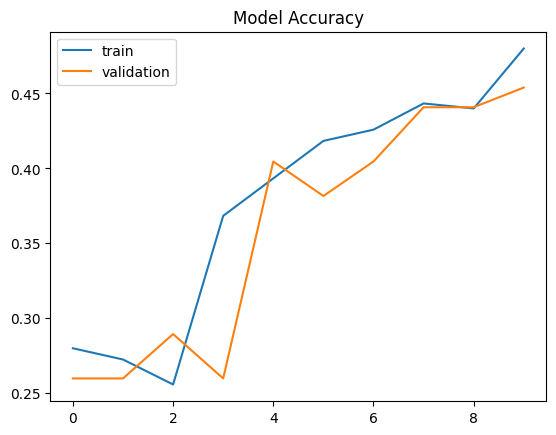

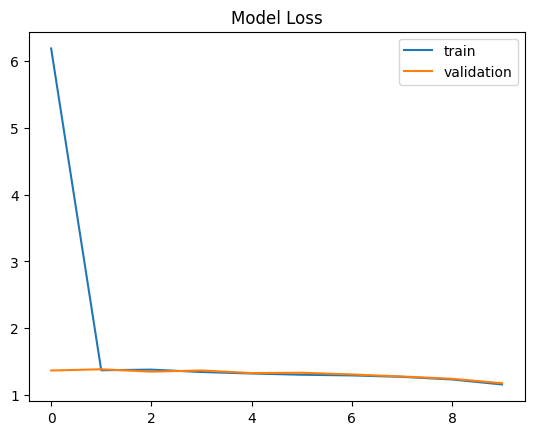

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

Kernel (4,4)

So we can say that the best kernel size for this model is (3,3)

In [ ]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 dense_8 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 dense_9 (Dense)             (None, 126, 126, 64)      4160      
                                                                 
 dropout_5 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 flatten_2 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epoch=6

In [ ]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/6
60/60 [==============================] - 113s 2s/step - loss: 4.2181 - accuracy: 0.3292 - val_loss: 1.3170 - val_accuracy: 0.3355
Epoch 2/6
60/60 [==============================] - 106s 2s/step - loss: 1.1394 - accuracy: 0.4958 - val_loss: 1.1013 - val_accuracy: 0.5526
Epoch 3/6
60/60 [==============================] - 105s 2s/step - loss: 0.9419 - accuracy: 0.6308 - val_loss: 1.0370 - val_accuracy: 0.5625
Epoch 4/6
60/60 [==============================] - 106s 2s/step - loss: 0.6734 - accuracy: 0.7400 - val_loss: 1.0016 - val_accuracy: 0.5888
Epoch 5/6
60/60 [==============================] - 103s 2s/step - loss: 0.3885 - accuracy: 0.8783 - val_loss: 1.0960 - val_accuracy: 0.5888
Epoch 6/6
60/60 [==============================] - 90s 2s/step - loss: 0.1560 - accuracy: 0.9567 - val_loss: 1.6552 - val_accuracy: 0.5296


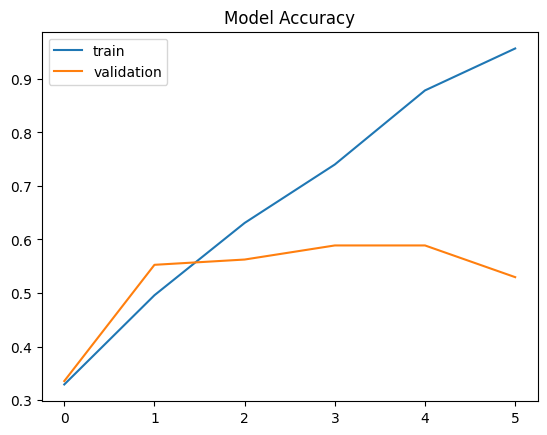

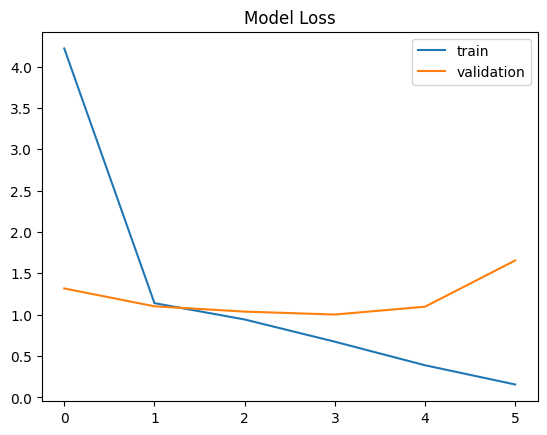

In [ ]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [ ]:
prediction=model.predict(X_test)
type(prediction[0])

10/10 [==============================] - 2s 211ms/step


numpy.ndarray

As the model produces prediction as tensors we have to find the actual prediction with the numpy function argmax (numpy.argmax).

In [ ]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

10/10 [==============================] - 2s 215ms/step


In [ ]:
min(y1),max(y1)

(0, 3)

In [ ]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [ ]:
y_train=y_train.reshape(1200)
y_test=y_test.reshape(304)

In [ ]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

#### Confusion matrix

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

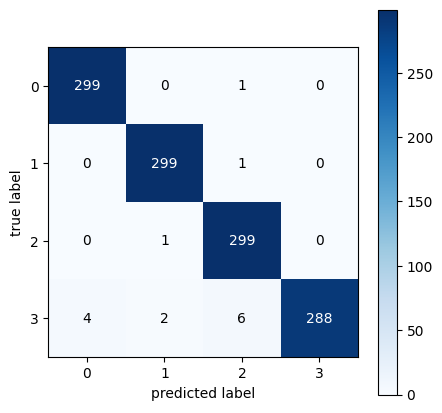

In [ ]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

(<Figure size 500x500 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

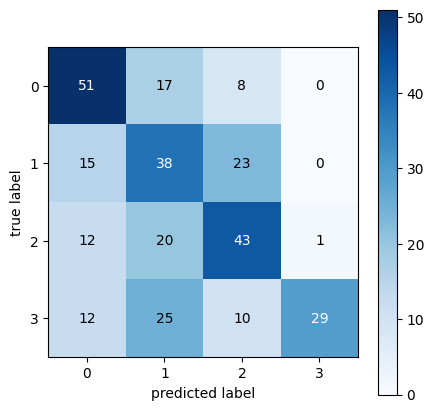

In [ ]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

#### download el archivo 

In [67]:
import joblib

In [68]:
data_afric = "data_afric.joblib"

In [69]:
joblib.dump(model, data_afric)

['data_afric.joblib']

In [71]:
import pickle
with open('data_afric.pkl', 'wb') as file:
    pickle.dump(model, file)


file.close()

with open('mi_archivo.pkl', 'rb') as file:
    loaded_data = pickle.load(file)